In [10]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
path = '../data/graphs/kw38/result_gambette'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        # TODO: Fix name, die to annotations
        df_tmp['Clustering'] = suffix[1].split('_')[-1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    df['bootstrap_jsd'] = df['bootstrap_jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'bootstrap_jsd':'inverse_bootstrap_jsd'}, inplace = True)

    return df

df = build_df_from_csvs(path)
df.head()

,Checkpoint,inverse_bootstrap_jsd,gambette_01,gambette_03,gambette_05,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,1.000000,1.000000,1.000000,0.999463,1,0.777550,0.000000,100,7,0.9,modifiedrandomwalk,cw
1,20,0.991072,0.997930,0.992387,0.990053,2,0.899899,0.015905,100,7,0.9,modifiedrandomwalk,cw
2,30,0.980014,0.991425,0.990108,0.984632,3,0.935431,0.010198,100,7,0.9,modifiedrandomwalk,cw
3,40,0.994139,0.985311,0.974023,0.964757,2,0.904203,0.442344,100,7,0.9,modifiedrandomwalk,cw
4,50,0.985005,0.961251,0.962915,0.959515,4,0.929335,0.090491,100,7,0.9,modifiedrandomwalk,cw


In [12]:
sns.set_theme(style="darkgrid")

checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

In [13]:
df_overview = pd.melt(df, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'gambette_01', 'gambette_03', 'gambette_05'], var_name='Measure', value_name='Performance')

df_overview.head()

,Checkpoint,k,log,Measure,Performance
0,10,7,0.9,ari,0.000000
1,20,7,0.9,ari,0.015905
2,30,7,0.9,ari,0.010198
3,40,7,0.9,ari,0.442344
4,50,7,0.9,ari,0.090491


In [14]:
df_overview['Measure'] = pd.Categorical(df_overview['Measure'], ['ari', 'gambette_01', 'gambette_03', 'gambette_05'])
df_overview = df_overview.sort_values('Measure')
df_overview.head()

,Checkpoint,k,log,Measure,Performance
0,10,7,0.9,ari,0.000000
255,10,20,0.3,ari,1.000000
254,5000,20,0.7,ari,0.989852
253,4000,20,0.7,ari,0.982828
252,3000,20,0.7,ari,0.984581


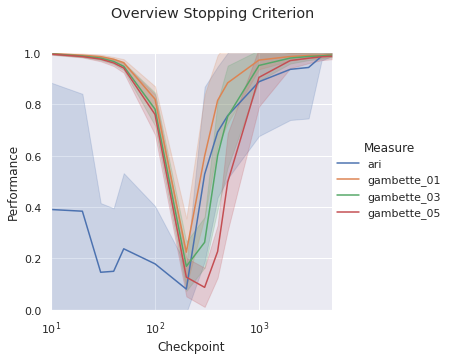

In [15]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Performance', hue='Measure', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview Stopping Criterion')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])